# Handling Missing Categorical Data

- Missing categorical data means some category values are absent (e.g., gender, color, type).

- It must be handled because most models cannot work with missing values.

- The method chosen depends on how much data is missing and its importance.

# Most Frequent Value Imputation (Mode Imputation)

- Replace missing values with the category that appears most often.

- Simple and fast to implement.

- Works well when missing data is small.

- May reduce data variability and introduce bias.

# Missing Category Imputation

-  a new category like “Unknown” or “Missing”.

- Treats missing data as meaningful information.

- Useful when missing values are frequent.

- Helps models learn patterns related to missingness.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('housing.csv',usecols = ['GarageQual','FireplaceQu','SalePrice'])

# Frequency Imputation

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

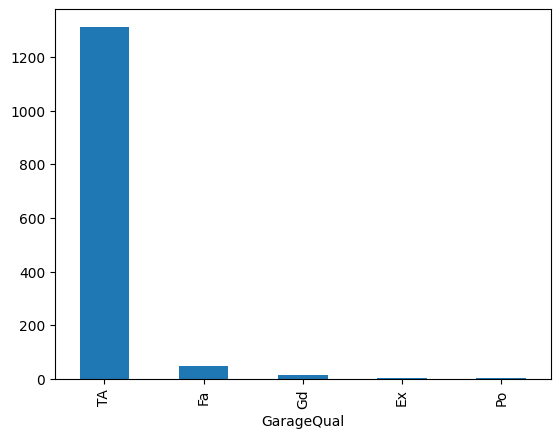

In [6]:
df['GarageQual'].value_counts().plot(kind = 'bar')

In [7]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

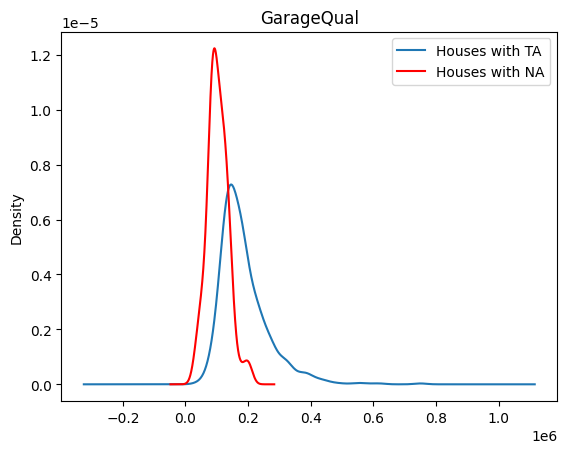

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [9]:
temp = df[df['GarageQual']=='TA']['SalePrice']


/var/folders/by/1y9dyrg52t3_69n_jld52myh0000gn/T/ipykernel_21323/3760816389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

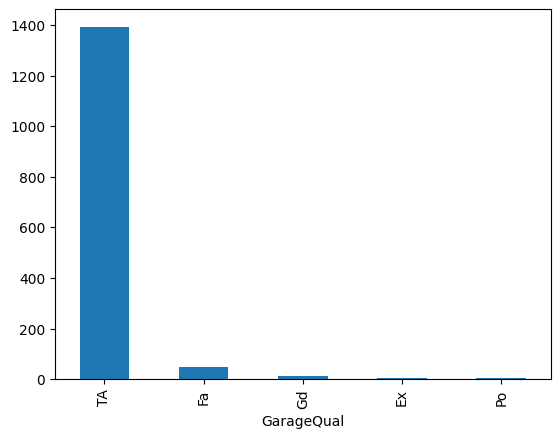

In [10]:
df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'GarageQual')

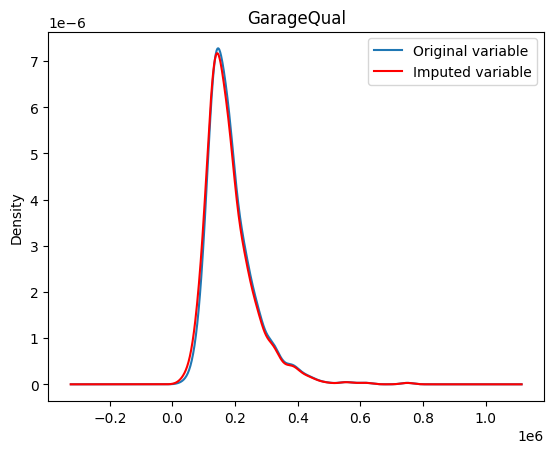

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

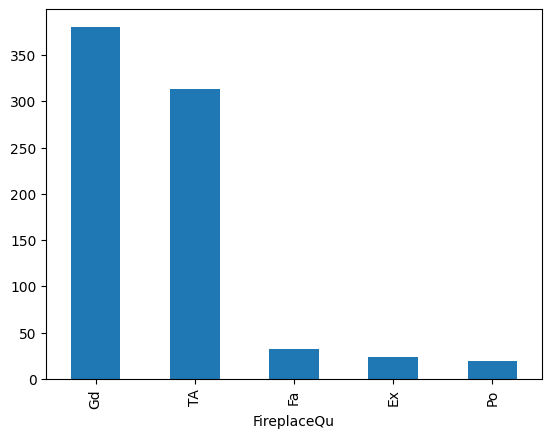

In [12]:
df['FireplaceQu'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'FireplaceQu')

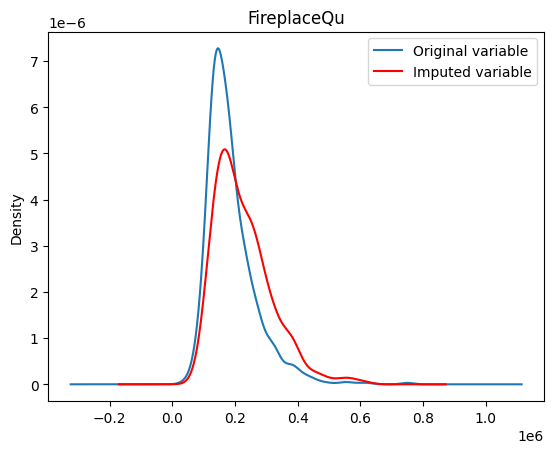

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer  = SimpleImputer(strategy = 'most_frequent')

In [25]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_train)

In [26]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# Missing Category Imputation

In [28]:
df1 = pd.read_csv('housing.csv',usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [29]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


Text(0, 0.5, 'Number of houses')

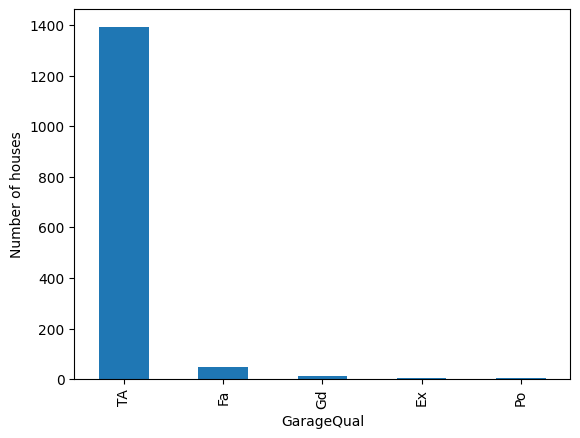

In [30]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')


In [31]:
df['GarageQual'].fillna('Missing', inplace=True)


Text(0, 0.5, 'Number of houses')

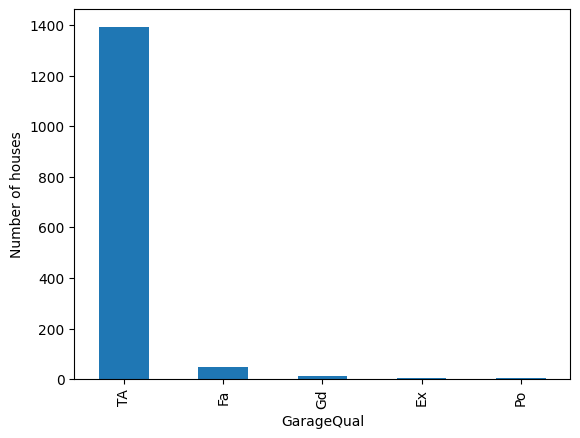

In [32]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)


In [34]:
from sklearn.impute import SimpleImputer


In [35]:
imputer1 = SimpleImputer(strategy='constant',fill_value='Missing')


In [40]:
X_train = imputer1.fit_transform(X_train)
X_test = imputer1.transform(X_train)

In [39]:
imputer1.statistics_


array(['Missing', 'Missing'], dtype=object)